In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:01<00:00, 153MB/s]
100% 163M/163M [00:02<00:00, 85.1MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# importing the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_716.jpg', 'with_mask_2899.jpg', 'with_mask_1288.jpg', 'with_mask_1701.jpg', 'with_mask_1043.jpg']
['with_mask_2949.jpg', 'with_mask_2385.jpg', 'with_mask_928.jpg', 'with_mask_1410.jpg', 'with_mask_2257.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2988.jpg', 'without_mask_2803.jpg', 'without_mask_3565.jpg', 'without_mask_496.jpg', 'without_mask_469.jpg']
['without_mask_2447.jpg', 'without_mask_760.jpg', 'without_mask_544.jpg', 'without_mask_2240.jpg', 'without_mask_2340.jpg']


In [ ]:
# No. of images in mask & without_mask folders
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# Creating Labels (with_mask---> 1 & without_mask---> 0)
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


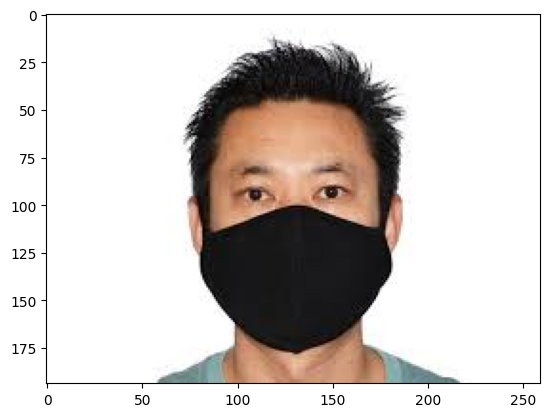

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2899.jpg')
imgplot = plt.imshow(img)
plt.show()

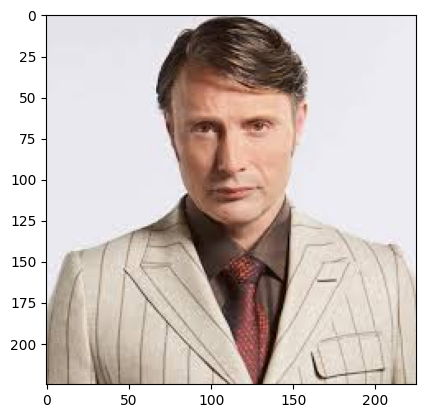

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2803.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[186, 186, 186],
        [185, 185, 185],
        [184, 184, 184],
        ...,
        [140, 140, 142],
        [137, 137, 137],
        [134, 134, 134]],

       [[188, 188, 187],
        [187, 187, 187],
        [186, 186, 186],
        ...,
        [142, 141, 141],
        [137, 138, 138],
        [134, 134, 136]],

       [[190, 190, 189],
        [188, 188, 188],
        [187, 187, 187],
        ...,
        [143, 143, 142],
        [138, 138, 138],
        [134, 134, 136]],

       ...,

       [[  7,   7,   6],
        [  9,   9,   8],
        [ 16,  16,  16],
        ...,
        [ 36,  37,  42],
        [ 40,  40,  45],
        [ 42,  41,  47]],

       [[  7,   7,   6],
        [  7,   7,   5],
        [ 10,  10,   8],
        ...,
        [ 37,  39,  44],
        [ 41,  41,  46],
        [ 42,  41,  48]],

       [[  8,   8,   6],
        [  6,   6,   4],
        [  7,   6,   4],
        ...,
        [ 40,  39,  45],
        [ 41,  41,  46],
        [ 41,  41,  47]]

In [ ]:
X_train_scaled[0]

array([[[0.72941176, 0.72941176, 0.72941176],
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.72156863, 0.72156863, 0.72156863],
        ...,
        [0.54901961, 0.54901961, 0.55686275],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.5254902 , 0.5254902 , 0.5254902 ]],

       [[0.7372549 , 0.7372549 , 0.73333333],
        [0.73333333, 0.73333333, 0.73333333],
        [0.72941176, 0.72941176, 0.72941176],
        ...,
        [0.55686275, 0.55294118, 0.55294118],
        [0.5372549 , 0.54117647, 0.54117647],
        [0.5254902 , 0.5254902 , 0.53333333]],

       [[0.74509804, 0.74509804, 0.74117647],
        [0.7372549 , 0.7372549 , 0.7372549 ],
        [0.73333333, 0.73333333, 0.73333333],
        ...,
        [0.56078431, 0.56078431, 0.55686275],
        [0.54117647, 0.54117647, 0.54117647],
        [0.5254902 , 0.5254902 , 0.53333333]],

       ...,

       [[0.02745098, 0.02745098, 0.02352941],
        [0.03529412, 0.03529412, 0.03137255],
        [0.0627451 , 0

**Building a convolutional neural network (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
 num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.4399 - acc: 0.8004 - val_loss: 0.2531 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2824 - acc: 0.8850 - val_loss: 0.2032 - val_acc: 0.9124
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2243 - acc: 0.9132 - val_loss: 0.1875 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1757 - acc: 0.9331 - val_loss: 0.2085 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1585 - acc: 0.9443 - val_loss: 0.1909 - val_acc: 0.9240


In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1910 - acc: 0.9305
Test Accuracy = 0.9305095672607422


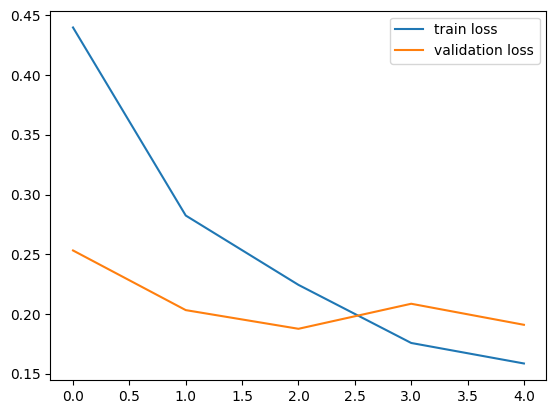

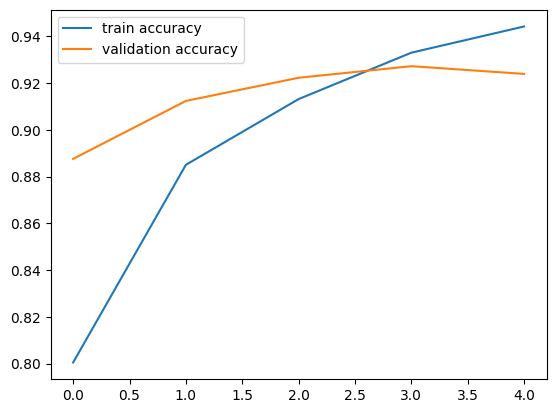

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test5.jpg


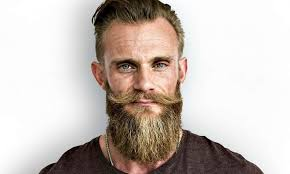

1/1 [==============================] - 0s 19ms/step
[[0.35768536 0.54512703]]
1
The person in the image is wearing a mask


In [ ]:
# Predictive System
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')